## Hierarichal Clustering Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import iris dataset
iris = datasets.load_iris()

In [4]:
df_iris = pd.DataFrame(iris.data)

In [5]:
df_iris.columns = iris.feature_names

In [6]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
X_scaled = scaler.fit_transform(df_iris)

In [11]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [12]:
X_scaled.shape

(150, 4)

### Dimentionality Reduction with PCA

PCA dimentionality reduction: reduce the data's dimentinality using PCA to visualize it ini a lower dimentional space while preserving important information

In [13]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=2)

In [17]:
pca_scaled = pca.fit_transform(X_scaled)

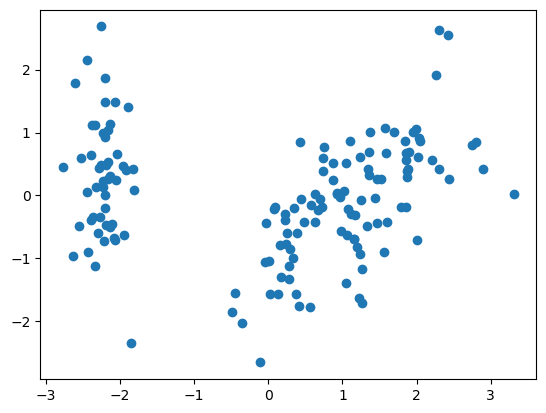

In [18]:
plt.scatter(pca_scaled[:,0], pca_scaled[:,1])

### Aglomerative Clustering
Aglomerative clustenring merges similar data points together to form clusters, creatig a hierarical structure represented as a dendrogram.

Text(0, 0.5, 'Euclidian distance')

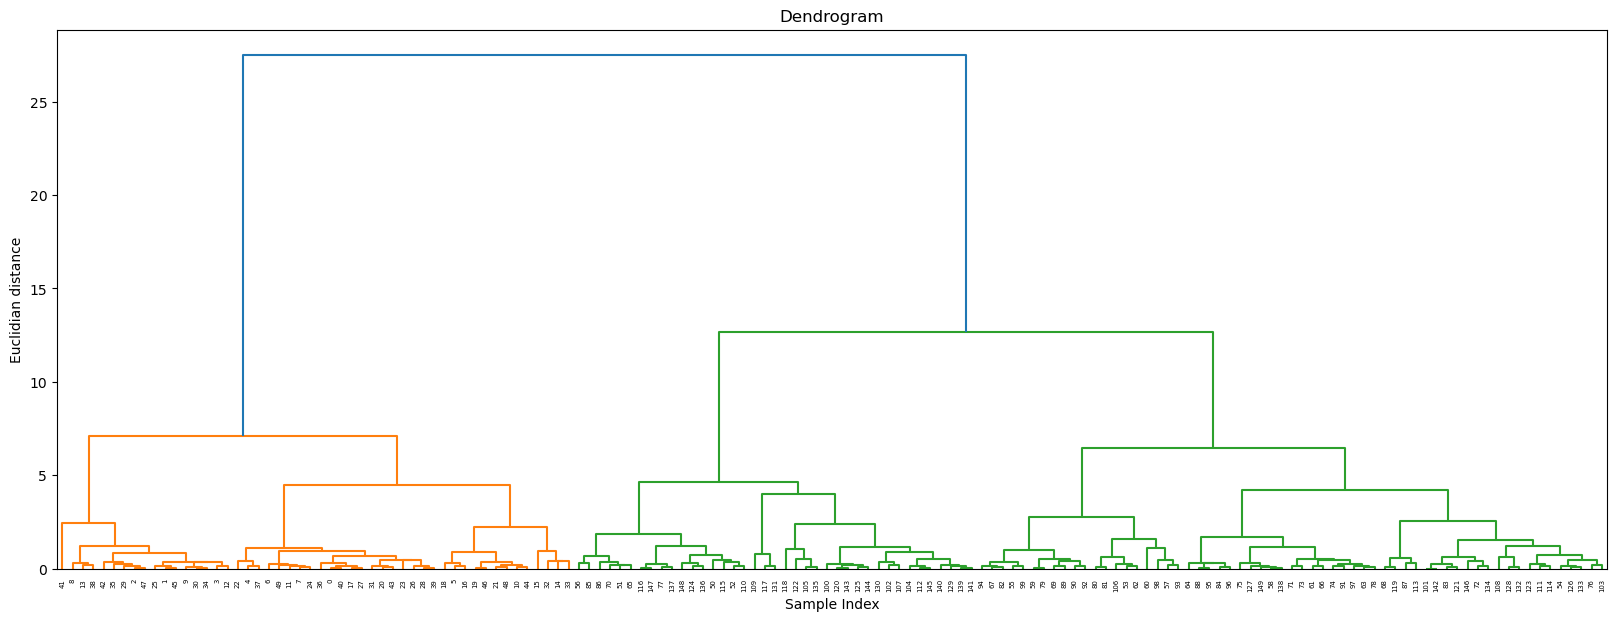

In [21]:
# To construc a dendogram
import scipy.cluster.hierarchy as sc

# plot the dendogram
plt.figure(figsize=(20, 7))
plt.title("Dendograms")

# Create dendogram
sc.dendrogram(sc.linkage(pca_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel("Sample Index")
plt.ylabel("Euclidian distance")

In [26]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [27]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

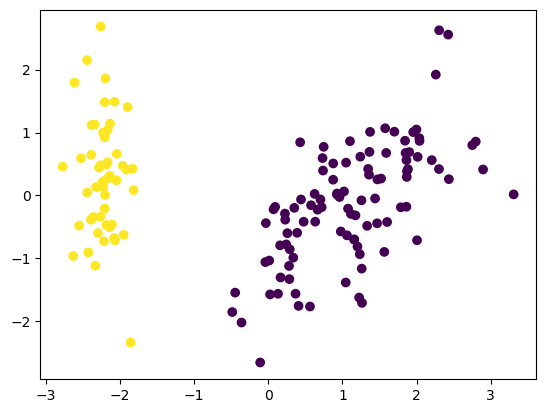

In [28]:
plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1], c=cluster.labels_)

### Silhoutte Score

In [29]:
from sklearn.metrics import silhouette_score

In [38]:
silhouette_coefficients = []
for k in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
    agglo.fit(X_scaled)
    score = silhouette_score(X_scaled, agglo.labels_)
    silhouette_coefficients.append(score)

<function matplotlib.pyplot.show(close=None, block=None)>

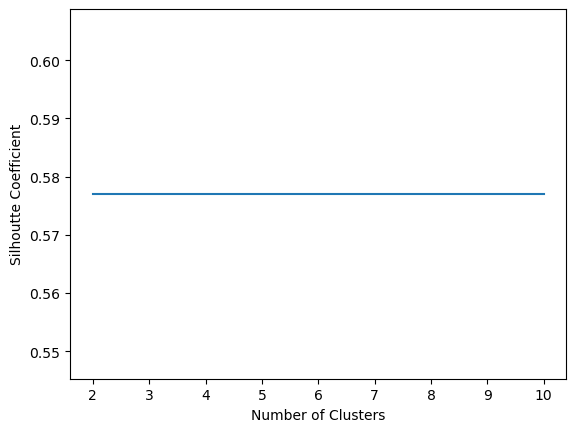

In [42]:
# Plotting silhouette_coefficients score
plt.plot(range(2, 11), silhouette_coefficients)

plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Coefficient")
plt.show

# Harusnya ngga lurus wkwkwk